<a href="https://colab.research.google.com/github/Tony6512/Kaggle-Datasets/blob/main/Yahoo_Finance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Get Data

In [ ]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
from tqdm import tqdm
import scipy

# visualization
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import KFold
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier,
                              GradientBoostingClassifier, ExtraTreesClassifier)

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.compose import ColumnTransformer

SEED = 0


In [ ]:
### kaggle
# df = pd.read_csv("/kaggle/input/yahoo-finance-data/Yahoo_Finance.csv")
### google colab
### mount drive and find file path via folders on the left-hand side
df = pd.read_csv('/content/drive/MyDrive/Kaggle/Yahoo finance dataset/Yahoo_Finance.csv')
df.head()

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2001-01-01,16.5000,16.500000,16.50,16.50,12.229188,0
1,1,2001-01-02,15.9875,16.299999,15.91,16.25,12.043896,1607584
2,2,2001-01-03,15.8775,15.947500,15.50,15.90,11.784488,506560
3,3,2001-01-04,16.1250,16.875000,15.75,16.50,12.229188,894416
4,4,2001-01-05,16.5000,16.500000,16.50,16.50,12.229188,0


In [ ]:
df.describe()

,Unnamed: 0,Open,High,Low,Close,Adj Close,Volume
count,5273.000000,5273.000000,5273.000000,5273.000000,5273.000000,5273.000000,5.273000e+03
mean,2636.000000,88.198201,89.157741,87.218366,88.204772,80.753280,2.066202e+06
std,1522.328315,82.631050,83.512501,81.744323,82.631009,82.378314,3.011263e+06
min,0.000000,12.002500,13.000000,11.517500,11.925000,8.960790,0.000000e+00
25%,1318.000000,30.662500,31.110001,30.472500,30.635000,24.333160,6.982070e+05
50%,2636.000000,48.005001,48.700001,47.389999,48.105000,39.985062,1.077092e+06
75%,3954.000000,117.000000,118.300003,115.599998,117.500000,108.177711,2.086246e+06
max,5272.000000,325.750000,336.250000,324.899994,336.250000,336.250000,9.053427e+07


In [ ]:
df.columns

Index(['Unnamed: 0', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close',
       'Volume'],
      dtype='object')

In [ ]:
df = df.rename(columns = {'Unnamed: 0':'Index'})

In [ ]:
df.shape

(5273, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5273 entries, 0 to 5272
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Index      5273 non-null   int64  
 1   Date       5273 non-null   object 
 2   Open       5273 non-null   float64
 3   High       5273 non-null   float64
 4   Low        5273 non-null   float64
 5   Close      5273 non-null   float64
 6   Adj Close  5273 non-null   float64
 7   Volume     5273 non-null   int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 329.7+ KB


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5273 entries, 0 to 5272
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Index      5273 non-null   int64         
 1   Date       5273 non-null   datetime64[ns]
 2   Open       5273 non-null   float64       
 3   High       5273 non-null   float64       
 4   Low        5273 non-null   float64       
 5   Close      5273 non-null   float64       
 6   Adj Close  5273 non-null   float64       
 7   Volume     5273 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 329.7 KB


In [ ]:
df_train = df.iloc[0:int(0.8*df.shape[0]),:]
df_test = df.iloc[int(0.8*df.shape[0])+1:,:]

In [ ]:
df_train.head()

,Index,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2001-01-01,16.5000,16.500000,16.50,16.50,12.229188,0
1,1,2001-01-02,15.9875,16.299999,15.91,16.25,12.043896,1607584
2,2,2001-01-03,15.8775,15.947500,15.50,15.90,11.784488,506560
3,3,2001-01-04,16.1250,16.875000,15.75,16.50,12.229188,894416
4,4,2001-01-05,16.5000,16.500000,16.50,16.50,12.229188,0


In [ ]:
df_train.shape

(4218, 8)

In [ ]:
df_test.shape

(1054, 8)

In [ ]:
# df_all = concat_df(df_train, df_test)
df_train.name = 'Training Set'
df_test.name = 'Test Set'
# df_all.name = 'All Set'
# PassengerId_test = df_test['PassengerId'] ## for submission
dfs = [df_train, df_test]

print(f'Training X Shape = {df_train.shape}')
print(f'Training y Shape = {df_train.shape[0]}')
print(f'Test X Shape = {df_test.shape}')
print(f'Test y Shape = {df_test.shape[0]}')
print(df_train.columns)
print(df_test.columns)

Training X Shape = (4218, 8)
Training y Shape = 4218
Test X Shape = (1054, 8)
Test y Shape = 1054
Index(['Index', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
Index(['Index', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [ ]:
for df_i in dfs:
    df_i.info()
    print('-'*50)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4218 entries, 0 to 4217
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Index      4218 non-null   int64         
 1   Date       4218 non-null   datetime64[ns]
 2   Open       4218 non-null   float64       
 3   High       4218 non-null   float64       
 4   Low        4218 non-null   float64       
 5   Close      4218 non-null   float64       
 6   Adj Close  4218 non-null   float64       
 7   Volume     4218 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 263.8 KB
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 4219 to 5272
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Index      1054 non-null   int64         
 1   Date       1054 non-null   datetime64[ns]
 2   

In [ ]:
def display_missing(df):
    for col in df.columns.tolist():
        print(f'{col} column missing values: {df[col].isnull().sum()}')
    print('\n')

In [ ]:
for df_i in dfs:
    print(f'{df_i.name}')
    display_missing(df_i)

Training Set
Index column missing values: 0
Date column missing values: 0
Open column missing values: 0
High column missing values: 0
Low column missing values: 0
Close column missing values: 0
Adj Close column missing values: 0
Volume column missing values: 0


Test Set
Index column missing values: 0
Date column missing values: 0
Open column missing values: 0
High column missing values: 0
Low column missing values: 0
Close column missing values: 0
Adj Close column missing values: 0
Volume column missing values: 0




# Visualization

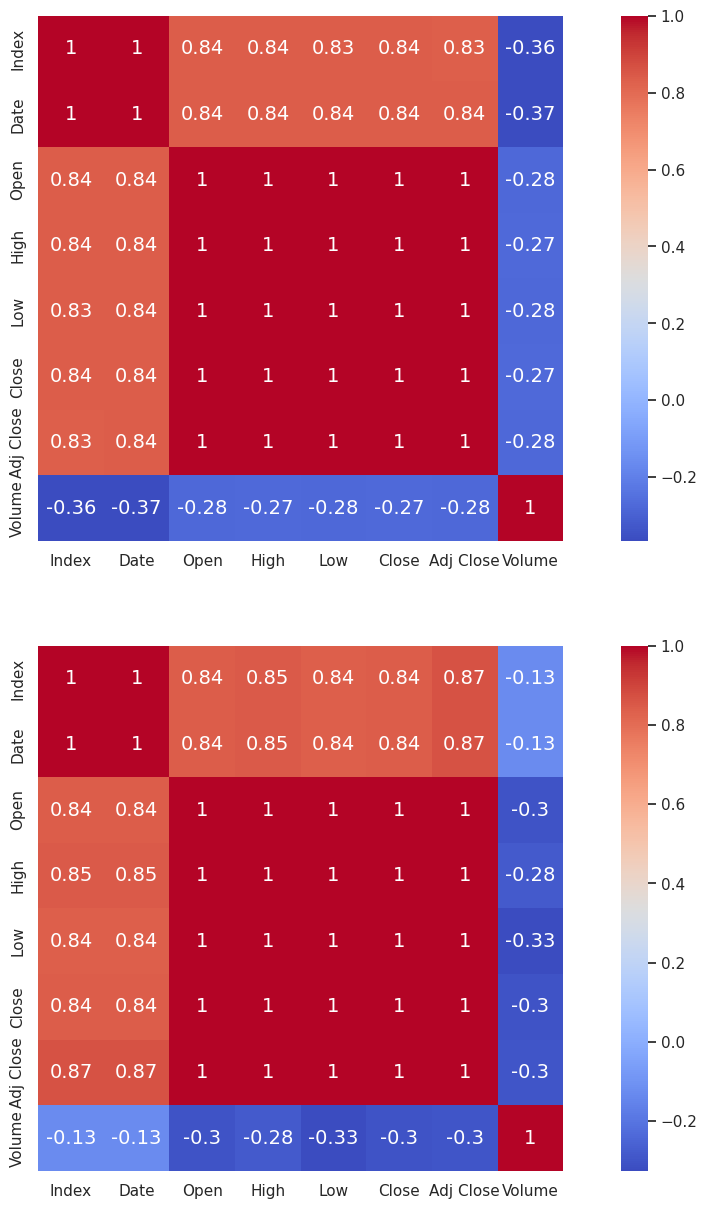

In [ ]:
fig, axs = plt.subplots(nrows=2, figsize=(15, 15))

sns.heatmap(df_train.corr(), ax=axs[0], annot=True, square=True, cmap='coolwarm', annot_kws={'size': 14})
sns.heatmap(df_test.corr(), ax=axs[1], annot=True, square=True, cmap='coolwarm', annot_kws={'size': 14})
plt.show()

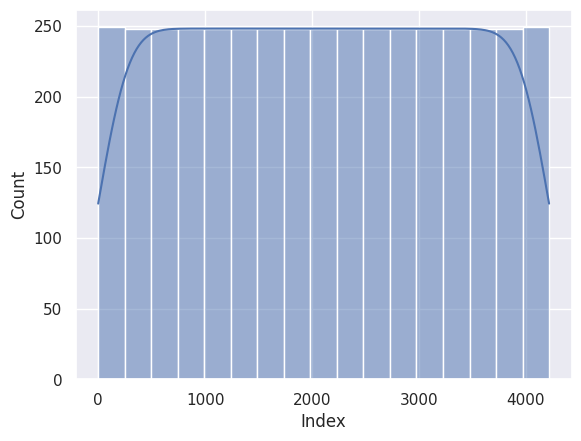

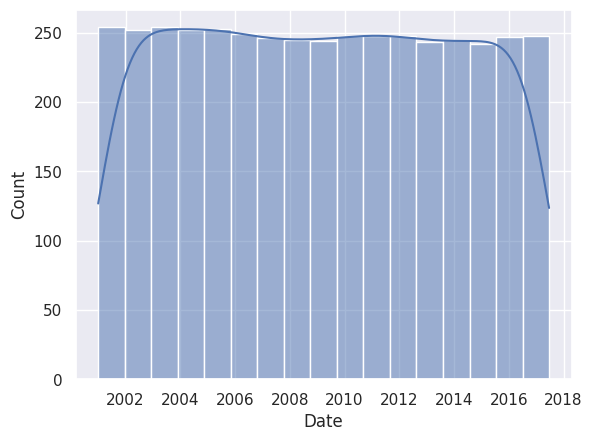

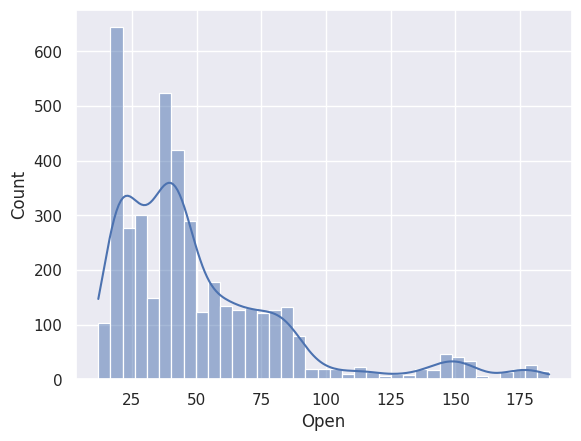

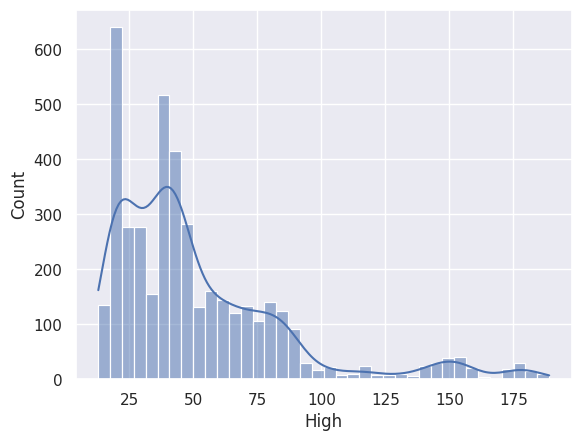

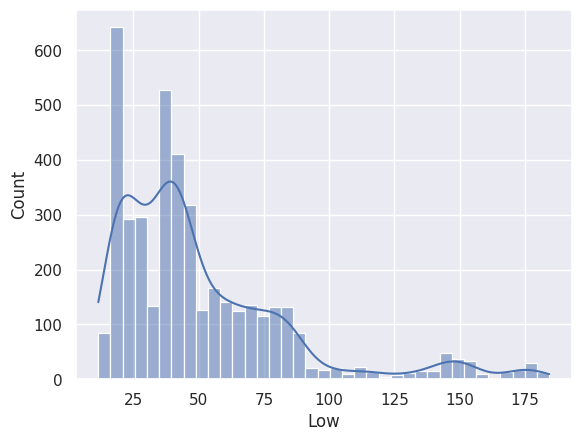

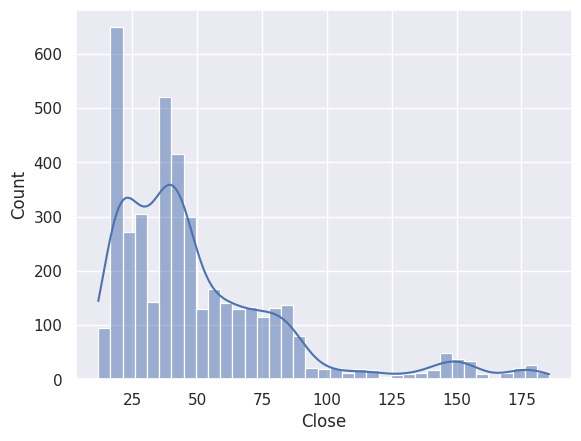

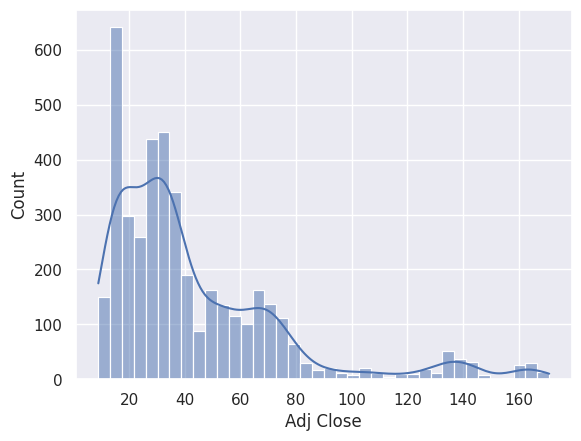

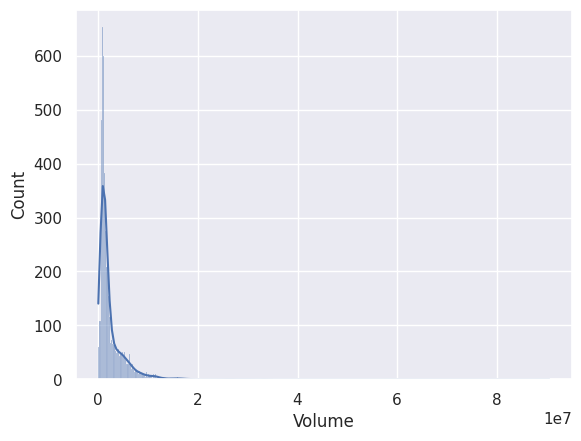

In [ ]:
for col in df_train.columns:
    sns.histplot(x= col, data=df_train, kde = True)
    plt.show()
    None

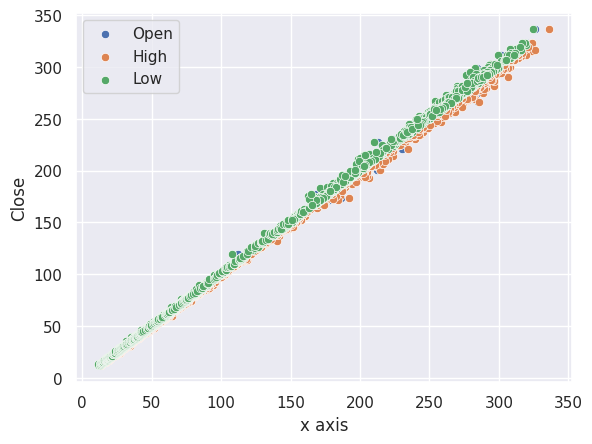

In [ ]:
for col in ['Open', 'High', 'Low']:
    sns.scatterplot(data = df, x = col, y = 'Close', label = f'{col}')
    plt.xlabel('x axis')
    plt.legend()
#     plt.show()
    None

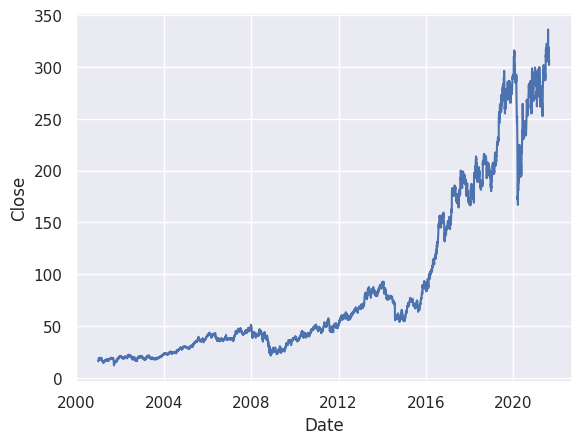

In [ ]:
plt.plot(df['Date'], df['Close'])
plt.xlabel('Date')
plt.ylabel('Close')
plt.show()
None

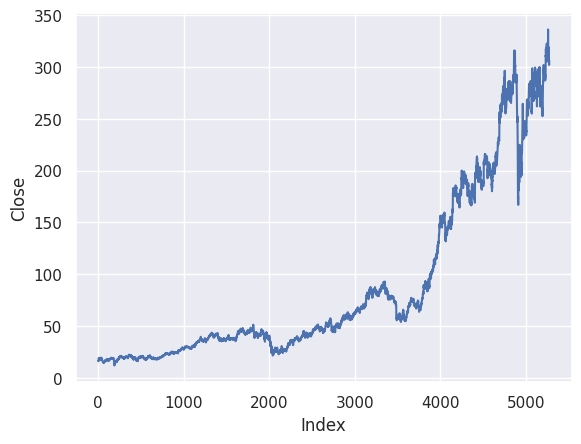

In [ ]:
plt.plot(df['Index'], df['Close'])
plt.xlabel('Index')
plt.ylabel('Close')
plt.show()
None

In [ ]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
import scipy

# visualization
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
import time
from time import perf_counter

# machine learning
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import KFold
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import train_test_split
# from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier,
# BaggingClassifier, HistGradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier, StackingClassifier)

from sklearn.ensemble import (RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor,
BaggingRegressor, HistGradientBoostingRegressor, ExtraTreesRegressor, VotingRegressor, StackingRegressor)
from sklearn.multioutput import MultiOutputRegressor
import xgboost as xgb
from xgboost import XGBRegressor

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import roc_curve, auc, r2_score, mean_squared_error
from sklearn.model_selection import StratifiedKFold
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance

SEED = 0

# Forcasting Close Price (with stacking)

In [ ]:
df.head(7)

,Index,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2001-01-01,16.500000,16.500000,16.500000,16.500000,12.229188,0
1,1,2001-01-02,15.987500,16.299999,15.910000,16.250000,12.043896,1607584
2,2,2001-01-03,15.877500,15.947500,15.500000,15.900000,11.784488,506560
3,3,2001-01-04,16.125000,16.875000,15.750000,16.500000,12.229188,894416
4,4,2001-01-05,16.500000,16.500000,16.500000,16.500000,12.229188,0
5,5,2001-01-08,17.049999,18.125000,17.012501,18.032499,13.365019,3076604
6,6,2001-01-09,18.174999,18.872499,17.887501,18.857500,13.976481,3463664


In [ ]:
df.shape

(5273, 8)

In [ ]:
df.index

RangeIndex(start=0, stop=5273, step=1)

In [ ]:
df['Lag_1'] = df['Close'].shift(1)

X = df.loc[:, ['Lag_1']]
X.dropna(inplace=True)  # drop missing values in the feature set
y = df.loc[:, 'Close']  # target
y, X = y.align(X, join='inner')  # drop corresponding values in target

X.head(7)

,Lag_1
1,16.500000
2,16.250000
3,15.900000
4,16.500000
5,16.500000
6,18.032499
7,18.857500


In [ ]:
# Create splits
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85, random_state = SEED, shuffle=False)

In [ ]:
for i in [X_train, y_train, X_test, y_test]:
    print(i.shape)

(4481, 1)
(4481,)
(791, 1)
(791,)


In [ ]:
model1 = LinearRegression()

In [ ]:
model1.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_fit = pd.DataFrame(model1.predict(X_train), index = y_train.index)
y_pred1 = pd.DataFrame(model1.predict(X_test), index = y_test.index)

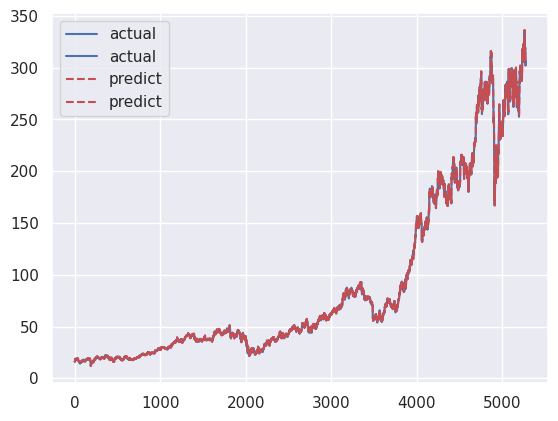

In [ ]:
plt.plot(y_train, 'b-', label = 'actual')
plt.plot(y_test, 'b-', label = 'actual')
plt.plot(y_fit, 'r--', label = 'predict')
plt.plot(y_pred1, 'r--', label = 'predict')
plt.legend()
plt.show()

In [ ]:
X_train2 = pd.concat([X_train, y_fit], axis = 1)
X_test2 = pd.concat([X_test, y_pred1], axis = 1)
# X_train2 = X_train.copy()
# X_test2 = X_test.copy()
X_train2

,Lag_1,0
1,16.500000,16.521755
2,16.250000,16.271666
3,15.900000,15.921541
4,16.500000,16.521755
5,16.500000,16.521755
...,...,...
4477,189.100006,189.183371
4478,184.000000,184.081545
4479,186.949997,187.032595
4480,183.550003,183.631387


In [ ]:
# y_train = pd.DataFrame(y_train)

In [ ]:
y_resid = np.array(y_train).reshape(-1,1) - np.array(y_fit)

In [ ]:
y_resid = pd.DataFrame(y_resid, index = y_train.index)

In [ ]:
X_train2.columns

Index(['Lag_1', 0], dtype='object')

In [ ]:
X_train2 = X_train2.rename(columns = {X_train2.columns[-1]:'pred1'})
X_test2 = X_test2.rename(columns = {X_test2.columns[-1]:'pred1'})
X_train2

,Lag_1,pred1
1,16.500000,16.521755
2,16.250000,16.271666
3,15.900000,15.921541
4,16.500000,16.521755
5,16.500000,16.521755
...,...,...
4477,189.100006,189.183371
4478,184.000000,184.081545
4479,186.949997,187.032595
4480,183.550003,183.631387


In [ ]:
# from sklearn.ensemble import (RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor,
# BaggingRegressor, HistGradientBoostingRegressor, ExtraTreesRegressor, VotingRegressor, StackingRegressor)
#####################################################
model2 = RandomForestRegressor()
model2.fit(X_train2, y_resid)

RandomForestRegressor()

In [ ]:
y_train.index

Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
       ...
       4472, 4473, 4474, 4475, 4476, 4477, 4478, 4479, 4480, 4481],
      dtype='int64', length=4481)

In [ ]:
y_fit2 = pd.DataFrame(model2.predict(X_train2), index = y_train.index ) + y_fit

In [ ]:
pd.DataFrame(model2.predict(X_train2), index = y_train.index )

,0
1,0.424100
2,-0.308420
3,0.449366
4,0.424100
5,0.424100
...,...
4477,-1.960459
4478,1.634492
4479,-2.475883
4480,0.688376


In [ ]:
# type(y_fit2)
# y_fit2 - y_fit

In [ ]:
y_pred2 = pd.DataFrame(model2.predict(X_test2), index = y_test.index) + y_pred1

In [ ]:
pd.DataFrame(model2.predict(X_test2), index = y_test.index)

,0
4482,0.788642
4483,-1.505278
4484,-0.528637
4485,-1.505278
4486,-1.840309
...,...
5268,-2.162973
5269,-2.162973
5270,-2.162973
5271,-2.162973


In [ ]:
r2_score(y_test, y_pred2)

0.9793641383900374

In [ ]:
mean_squared_error(y_test, y_pred2)

30.54054283247795

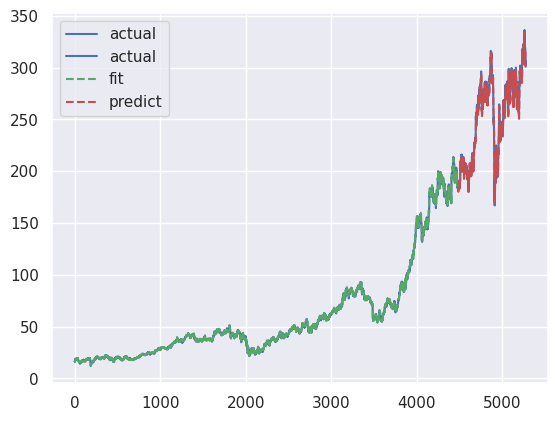

In [ ]:
plt.plot(y_train, 'b-', label = 'actual')
plt.plot(y_test, 'b-', label = 'actual')
plt.plot(y_fit2, 'g--', label = 'fit')
plt.plot(y_pred2, 'r--', label = 'predict')
plt.legend()
plt.show()

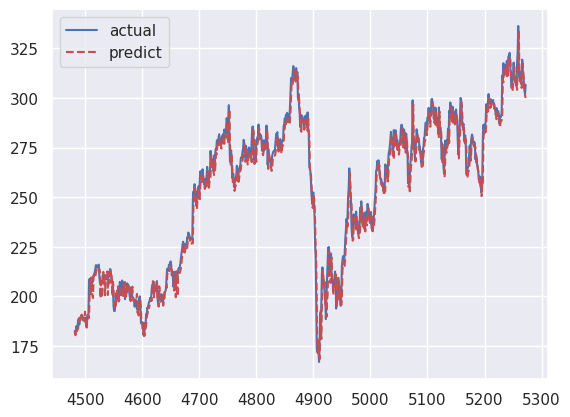

In [ ]:
plt.plot(y_test, 'b-', label = 'actual')
plt.plot(y_pred2, 'r--', label = 'predict')
plt.legend()
plt.show()

# Monte Carlo Simulation

In [ ]:
# from tqdm import tqdm

We can use monte carlo simulation use the geometric Brownian motion (GBM) to predict the closing price. Recall the stochastic differential equation (SDE)
$$ d S_t = \mu S_t dt + \sigma S_t dW_t,$$
which can be solved analytically to get the closed form solution
$$ S_t = S_0 \exp (   (\mu - 0.5 \sigma ^ 2)t + \sigma W_t ) .$$
The stochastic process $S_t$ follows a GBM. The Wiener process or Brownian motion is denoted as $W_t$.
We have $\mu$ is the percentage drift and $\sigma$ is the percentage volatility. By definition of Brownian motion, $W_{t+ dt} - W_t \sim \mathcal{N}(0, \sqrt{dt})$. Thus, from the SDE, we obtain the difference equation ($dt = 1$)
$$ S_{t+1} = S_t (1 + \mu + \sigma \epsilon), $$
for $\epsilon \sim \mathcal{N}(0, 1)$.

In [ ]:
df['Close'].shape

(5273,)

In [ ]:
number_simulation = 200
### take in data starting at init and going to start
### we begin predict values from start to stop
init = 1000
start = 2120 ## have start higher than 0 to have values in returns variable
stop = 2140
# start = int(df['Close'].shape[0] * 0.8)
# stop = df['Close'].shape[0]
dynamic = True  ### update drift and volatility in loop

# returns = df.Close[initialize:start].pct_change() ## relative change
# returns = df.Close[start:stop].pct_change() ## relative change
returns = df.Close[init:start].pct_change()
returns_length = len(returns)
# volatility = returns.std() ## sigma
results = pd.DataFrame()

###
drift = returns.mean()
# variance = returns.var() ## sigma ^ 2
volatility = returns.std() ## sigma
# daily_drift = avg_daily_ret - (variance / 2)
# drift = daily_drift - 0.5 * daily_vol ** 2
##

def drift_func(drift, last_return, length):
    """
    updates the drift (mean)
    """
    return drift + (last_return - drift) / length
def volatility_func(volatility, last_return, drift, drift_prev, length):
    """
    updates the volatility  (standard deviation or sqrt(variance))
    """
    return np.sqrt( volatility**2 + ((last_return - drift) * (last_return - drift_prev) - volatility**2) / (length-1) )
def percent_change(new, old):
    return (new - old) / old


for i in tqdm(range(number_simulation)):
  prices = [df.Close.iloc[start]] * (stop - start + 1)
  if dynamic:
    drift = returns.mean()
    volatility = returns.std()
    drift_prev = drift
    last_return = percent_change(prices[0], df.Close.iloc[start - 1])
    drift = drift_func(drift, last_return, returns_length)
    volatility = volatility_func(volatility, last_return, drift, drift_prev, returns_length)
  for d in range(stop - start):
    # prices[d+1] = prices[d] * (1 + drift + scipy.stats.norm.rvs(0, volatility))
    prices[d+1] = prices[d] * (1 + drift + volatility * scipy.stats.norm.rvs(0, 1))
    if dynamic:
      drift_prev = drift
      last_return = percent_change(prices[-1], prices[-2])
      # last_return = percent_change(df.Close.iloc[start + d + 1], df.Close.iloc[start + d])
      drift = drift_func(drift, last_return, returns_length + d+1)
      volatility = volatility_func(volatility, last_return, drift, drift_prev, returns_length + d+1)
  results[i] = pd.Series(prices).values

100%|██████████| 200/200 [00:00<00:00, 427.32it/s]


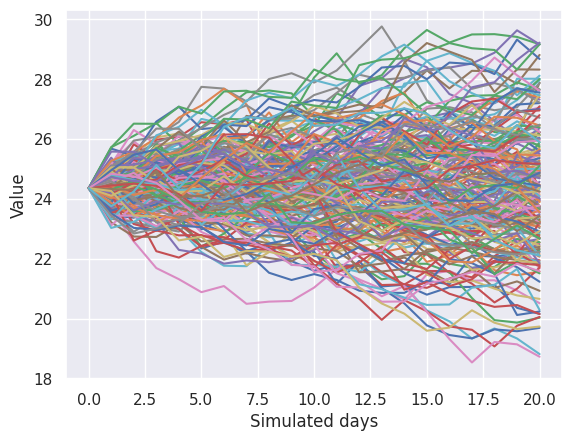

In [ ]:
plt.plot(results)
plt.ylabel('Value')
plt.xlabel('Simulated days')
plt.show()

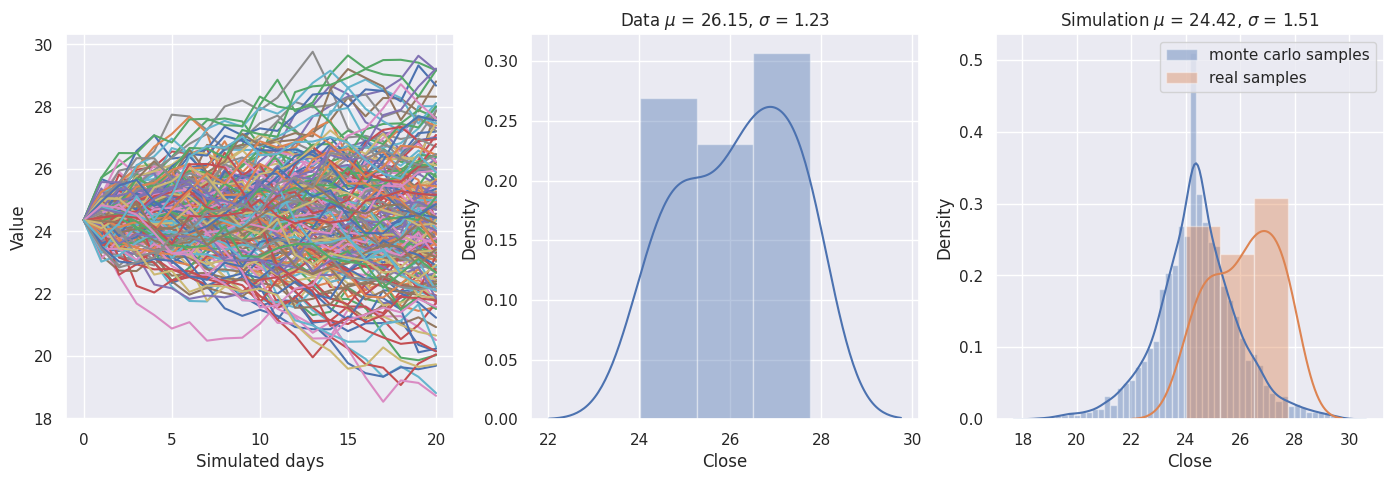

In [ ]:
raveled = results.values.ravel()
raveled.sort()
cp_raveled = raveled.copy()

plt.figure(figsize=(17,5))
plt.subplot(1,3,1)
plt.plot(results)
plt.ylabel('Value')
plt.xlabel('Simulated days')
plt.subplot(1,3,2)
sns.distplot(df.Close[start:stop+1],norm_hist=True,)
# plt.title('Data $\mu$ = %.2f, $\sigma$ = %.2f'%(df.Close[start:stop+1].mean(),df.Close[start:stop+1].std()))
plt.title(f'Data $\mu$ = {df.Close[start:stop+1].mean():.2f}, $\sigma$ = {df.Close[start:stop+1].std():.2f}')
plt.subplot(1,3,3)
sns.distplot(raveled,norm_hist=True,label='monte carlo samples')
sns.distplot(df.Close[start:stop+1],norm_hist=True,label='real samples')
# plt.title('Simulation $\mu$ = %.2f, $\sigma$ = %.2f'%(raveled.mean(),raveled.std()))
plt.title(f'Simulation $\mu$ = {raveled.mean():.2f}, $\sigma$ = {raveled.std():.2f}')
plt.legend()
plt.show()

In [ ]:
## compare average of predictions to data
mean_results = results.mean(axis = 1)
median_results = results.median(axis = 1)

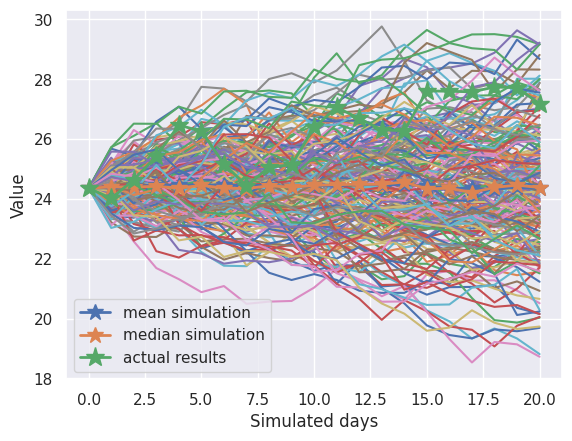

In [ ]:
x_axis = np.arange(len(mean_results))
plt.plot(results)
plt.plot(x_axis, mean_results, '*-', linewidth = 2, markersize=12, label = 'mean simulation')
plt.plot(x_axis, median_results, '*-', linewidth = 2, markersize=12, label = 'median simulation')
plt.plot(x_axis, df['Close'].iloc[start:stop + 1], '*-',linewidth = 2, markersize=14, label = 'actual results')
plt.ylabel('Value')
plt.xlabel('Simulated days')
# plt.title('')
plt.legend()
plt.show()

In [ ]:
mean_squared_error(mean_results, df['Close'].iloc[start:stop + 1])

4.458350166915603

In [ ]:
mean_squared_error(median_results, df['Close'].iloc[start:stop + 1])

4.487658784754747

# Using Momentum Features

In [ ]:
df.columns

Index(['Index', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Lag_1'],
      dtype='object')

In [ ]:
def indicators(dataset, price = 'Close', volume = 'Volume', min_periods = 1):
    # Create 7 and 21 days Moving Average
    dataset['ma7'] = dataset[price].rolling(window=7, min_periods = min_periods).mean()
    dataset['ma21'] = dataset[price].rolling(window=21, min_periods = min_periods).mean()

    # Moving Median
    dataset['mm7'] = dataset[price].rolling(window=7, min_periods = min_periods).median()
    dataset['mm21'] = dataset[price].rolling(window=21, min_periods = min_periods).median()

    # Create MACD (Moving Average Convergence Divergence)
    dataset['26ema'] = dataset[price].ewm(span=26, min_periods = min_periods).mean()
    dataset['12ema'] = dataset[price].ewm(span=12, min_periods = min_periods).mean()
    dataset['MACD'] = (dataset['12ema']-dataset['26ema'])

    # Create Bollinger Bands
    dataset['20sd'] = dataset[price].rolling(window = 20, min_periods = min_periods).std()
    dataset['upper_band'] = dataset['ma21'] + 2*dataset['20sd']
    dataset['lower_band'] = dataset['ma21'] - 2*dataset['20sd']

    # Create Exponential moving average
    dataset['ema'] = dataset[price].ewm(com=0.5, min_periods = min_periods).mean()

    # Volume Moving Average
    dataset['VMA_15MA'] = dataset[volume].rolling(window=15, min_periods = min_periods).mean()
    dataset['VMA_30MA'] = dataset[volume].rolling(window=30, min_periods = min_periods).mean()

    return dataset.shift(1)  ## avoid leakage

In [ ]:
df_indicators = df[['Close', 'Volume']]
df_indicators = indicators(df_indicators)

In [ ]:
df_indicators.head(10)

,Close,Volume,ma7,ma21,mm7,mm21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,VMA_15MA,VMA_30MA
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,16.500000,0.0,16.500000,16.500000,16.500000,16.500,16.500000,16.500000,0.000000,NaN,NaN,NaN,16.500000,0.000000e+00,0.000000e+00
2,16.250000,1607584.0,16.375000,16.375000,16.375000,16.375,16.370192,16.364583,-0.005609,0.176777,16.728553,16.021447,16.312500,8.037920e+05,8.037920e+05
3,15.900000,506560.0,16.216667,16.216667,16.250000,16.250,16.201257,16.183256,-0.018000,0.301386,16.819438,15.613895,16.026923,7.047147e+05,7.047147e+05
4,16.500000,894416.0,16.287500,16.287500,16.375000,16.375,16.284772,16.283240,-0.001532,0.283945,16.855391,15.719609,16.346250,7.521400e+05,7.521400e+05
5,16.500000,0.0,16.330000,16.330000,16.500000,16.500,16.334685,16.342133,0.007448,0.263629,16.857257,15.802743,16.449174,6.017120e+05,6.017120e+05
6,18.032499,3076604.0,16.613750,16.613750,16.500000,16.500,16.674743,16.752981,0.078238,0.733951,18.081651,15.145848,17.506174,1.014194e+06,1.014194e+06
7,18.857500,3463664.0,16.934286,16.934286,16.500000,16.500,17.062935,17.222597,0.159662,1.080789,19.095864,14.772707,18.407470,1.364118e+06,1.364118e+06
8,18.400000,1873312.0,17.205714,17.117500,16.500000,16.500,17.278369,17.468303,0.189933,1.126842,19.371184,14.863816,18.402489,1.427768e+06,1.427768e+06
9,18.115000,1479344.0,17.472143,17.228333,18.032499,16.500,17.402376,17.596242,0.193866,1.105264,19.438860,15.017806,18.210820,1.433498e+06,1.433498e+06


In [ ]:
y = df['Close']
X = df_indicators.dropna()
# y = y.dropna()

In [ ]:
X

,Close,Volume,ma7,ma21,mm7,mm21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,VMA_15MA,VMA_30MA
2,16.250000,1607584.0,16.375000,16.375000,16.375000,16.375000,16.370192,16.364583,-0.005609,0.176777,16.728553,16.021447,16.312500,8.037920e+05,8.037920e+05
3,15.900000,506560.0,16.216667,16.216667,16.250000,16.250000,16.201257,16.183256,-0.018000,0.301386,16.819438,15.613895,16.026923,7.047147e+05,7.047147e+05
4,16.500000,894416.0,16.287500,16.287500,16.375000,16.375000,16.284772,16.283240,-0.001532,0.283945,16.855391,15.719609,16.346250,7.521400e+05,7.521400e+05
5,16.500000,0.0,16.330000,16.330000,16.500000,16.500000,16.334685,16.342133,0.007448,0.263629,16.857257,15.802743,16.449174,6.017120e+05,6.017120e+05
6,18.032499,3076604.0,16.613750,16.613750,16.500000,16.500000,16.674743,16.752981,0.078238,0.733951,18.081651,15.145848,17.506174,1.014194e+06,1.014194e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5268,313.750000,360842.0,312.085711,312.947619,312.000000,312.000000,312.727247,313.954482,1.227236,7.115909,327.179437,298.715801,314.647611,5.010095e+05,4.437480e+05
5269,311.700012,275059.0,312.250000,313.245238,312.000000,312.000000,312.651155,313.607641,0.956485,6.882353,327.009944,299.480532,312.682545,4.949997e+05,4.409398e+05
5270,307.000000,396460.0,311.385716,313.321429,311.700012,312.000000,312.232551,312.591081,0.358529,6.949134,327.219697,299.423160,308.894182,4.998569e+05,4.378724e+05
5271,303.350006,563314.0,310.600002,313.076191,311.700012,312.000000,311.574585,311.169377,-0.405208,7.313344,327.702878,298.449504,305.198065,5.171115e+05,4.398759e+05


In [ ]:
y, X = y.align(X, join='inner', axis=0)

In [ ]:
X = X.rename(columns = {'Close':'lag_1'})

In [ ]:
X

,lag_1,Volume,ma7,ma21,mm7,mm21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,VMA_15MA,VMA_30MA
2,16.250000,1607584.0,16.375000,16.375000,16.375000,16.375000,16.370192,16.364583,-0.005609,0.176777,16.728553,16.021447,16.312500,8.037920e+05,8.037920e+05
3,15.900000,506560.0,16.216667,16.216667,16.250000,16.250000,16.201257,16.183256,-0.018000,0.301386,16.819438,15.613895,16.026923,7.047147e+05,7.047147e+05
4,16.500000,894416.0,16.287500,16.287500,16.375000,16.375000,16.284772,16.283240,-0.001532,0.283945,16.855391,15.719609,16.346250,7.521400e+05,7.521400e+05
5,16.500000,0.0,16.330000,16.330000,16.500000,16.500000,16.334685,16.342133,0.007448,0.263629,16.857257,15.802743,16.449174,6.017120e+05,6.017120e+05
6,18.032499,3076604.0,16.613750,16.613750,16.500000,16.500000,16.674743,16.752981,0.078238,0.733951,18.081651,15.145848,17.506174,1.014194e+06,1.014194e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5268,313.750000,360842.0,312.085711,312.947619,312.000000,312.000000,312.727247,313.954482,1.227236,7.115909,327.179437,298.715801,314.647611,5.010095e+05,4.437480e+05
5269,311.700012,275059.0,312.250000,313.245238,312.000000,312.000000,312.651155,313.607641,0.956485,6.882353,327.009944,299.480532,312.682545,4.949997e+05,4.409398e+05
5270,307.000000,396460.0,311.385716,313.321429,311.700012,312.000000,312.232551,312.591081,0.358529,6.949134,327.219697,299.423160,308.894182,4.998569e+05,4.378724e+05
5271,303.350006,563314.0,310.600002,313.076191,311.700012,312.000000,311.574585,311.169377,-0.405208,7.313344,327.702878,298.449504,305.198065,5.171115e+05,4.398759e+05


In [ ]:
X.columns

Index(['lag_1', 'Volume', 'ma7', 'ma21', 'mm7', 'mm21', '26ema', '12ema',
       'MACD', '20sd', 'upper_band', 'lower_band', 'ema', 'VMA_15MA',
       'VMA_30MA'],
      dtype='object')

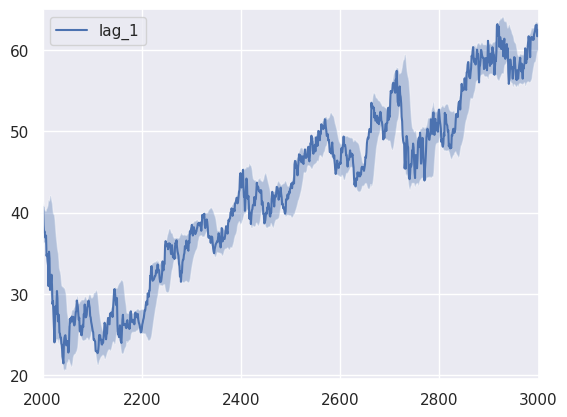

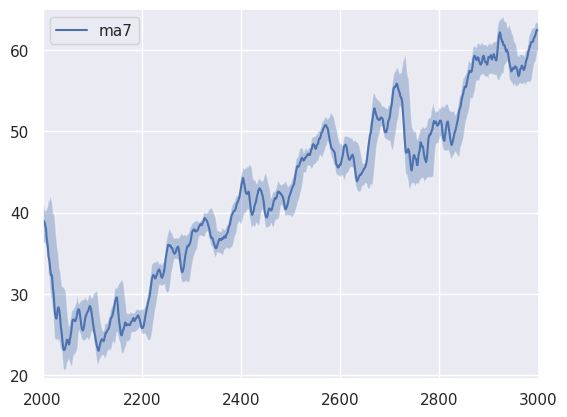

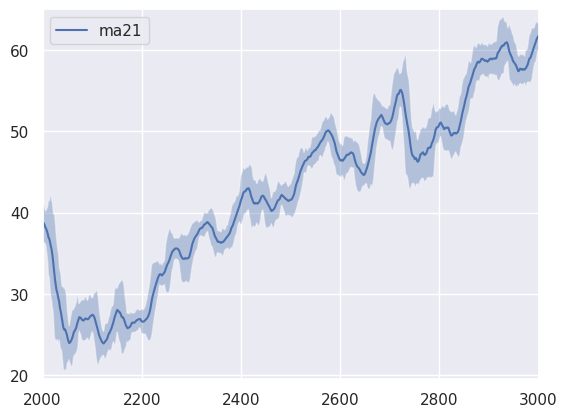

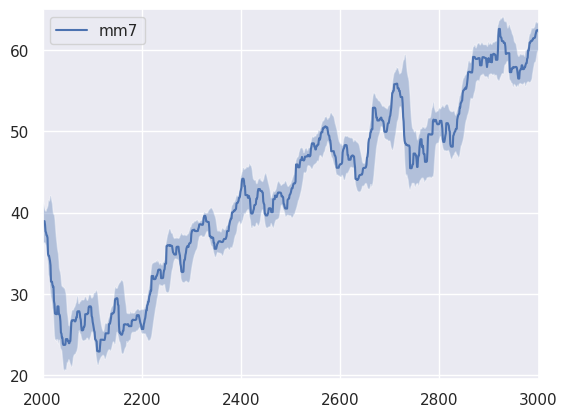

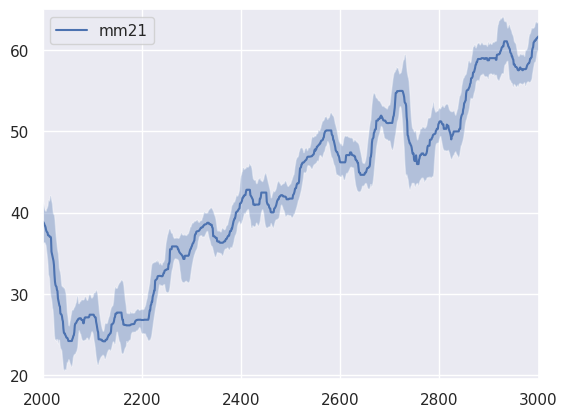

In [ ]:
for feat in X.columns:
  if feat in ['lag_1', 'ma7', 'ma21', 'mm7', 'mm21']:
    plt.plot(X[f'{feat}'], label = f'{feat}')
    plt.fill_between(list(X.index), X['lower_band'], X['upper_band'], alpha=0.35)
    x1, x2 = 2000, 3000
    plt.xlim([x1, x2])
    plt.ylim([min(X['lower_band'].iloc[x1:x2]) -1, max(X['upper_band'].iloc[x1:x2])+1])
    plt.legend()
    plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85, random_state = SEED, shuffle=False)

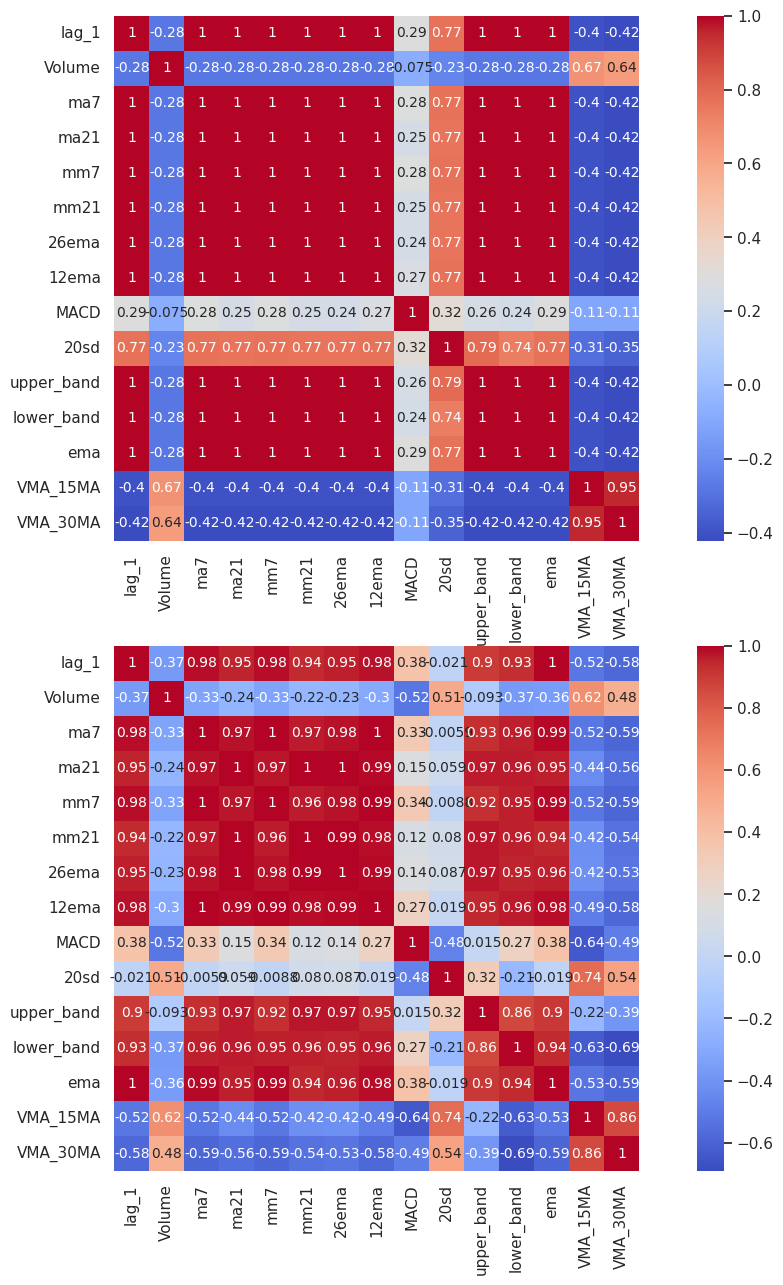

In [ ]:
fig, axs = plt.subplots(nrows=2, figsize=(15, 15))

sns.heatmap(X_train.corr(), ax=axs[0], annot=True, square=True, cmap='coolwarm', annot_kws={'size': 10})
sns.heatmap(X_test.corr(), ax=axs[1], annot=True, square=True, cmap='coolwarm', annot_kws={'size': 10})
plt.show()

In [ ]:
## tranform data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_test

array([[ 0.8436377 ,  0.00663672,  0.86743973, ...,  0.84961314,
         0.03143996,  0.0304564 ],
       [ 0.84215095,  0.00719662,  0.86345107, ...,  0.84563567,
         0.0299948 ,  0.02965406],
       [ 0.84041632,  0.00614513,  0.85798911, ...,  0.84314722,
         0.02538912,  0.02801701],
       ...,
       [ 1.46239626,  0.00437912,  1.5009909 , ...,  1.47665603,
         0.00386278, -0.00494993],
       [ 1.44430683,  0.00622211,  1.49703816, ...,  1.4582398 ,
         0.0050241 , -0.00477904],
       [ 1.43761618,  0.00456373,  1.4933729 , ...,  1.4476167 ,
         0.00467801, -0.00471764]])

In [ ]:
# model = RandomForestRegressor(n_estimators = 300,
#                            random_state = SEED).fit(X_train, y_train)
# model = GradientBoostingRegressor(n_estimators = 300,
#                            random_state = SEED).fit(X_train, y_train)
# model = ElasticNet(random_state = SEED).fit(X_train, y_train)
model = LinearRegression().fit(X_train, y_train)

In [ ]:
y_fit = pd.DataFrame(model.predict(X_train), index = y_train.index)
y_pred = pd.DataFrame(model.predict(X_test), index = y_test.index)

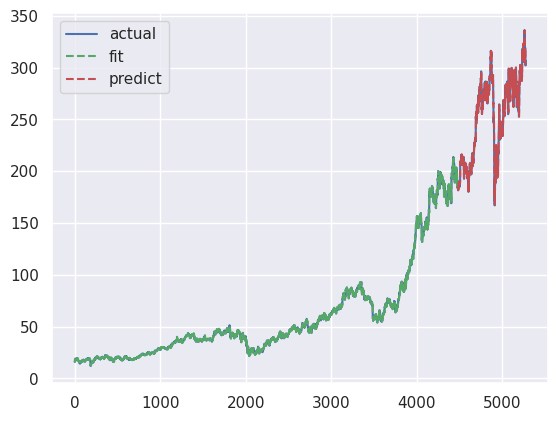

In [ ]:
plt.plot(y_train, 'b-', label = 'actual')
# plt.plot(y_test, 'b-', label = 'actual')
plt.plot(y_test, 'b-')
plt.plot(y_fit, 'g--', label = 'fit')
plt.plot(y_pred, 'r--', label = 'predict')
plt.legend()
plt.show()

In [ ]:
mean_squared_error(y_pred, y_test)

25.32842641416275

# End